In [1]:
from icecube import dataio, dataclasses, icetray, simclasses, genie_icetray
import matplotlib.pyplot as plt
import scipy
import matplotlib as mpl
import numpy as np

ImportError: cannot import name 'genie_icetray' from 'icecube' (unknown location)

In [2]:
from icecube import NuFlux
flux_model = NuFlux.makeFlux('IPhonda2014_spl_solmin')
print 'foo'

foo


In [3]:
saveIt = True
save_loc = '/afs/ifh.de/user/b/blotsd/scratch/NuTridentProduction/plots/'

In [4]:
def propagationDistance(zenith):
    L1 = 19.
    R = 6378.2 + L1
    phi = np.arcsin((1-L1/R)*np.sin(zenith))
    psi = zenith - phi
    return np.sqrt( (R-L1)**2 + R**2 - (2*(R-L1)*R*np.cos(psi)))

In [5]:
# calculate oscillation probability in the 2 neutrino limit

def getOscProbTwoNu(nu_energy, nu_zenith):
    
    theta23 = 0.80449819755 
    dm31 = 0.00257011799031
    
    amplitude = np.sin(2*theta23)**2
    L = propagationDistance(nu_zenith)
        
    numu_to_nutau = amplitude*np.sin(1.267*dm31*L/nu_energy)**2
    numu_to_numu = 1 - numu_to_nutau
    
    return numu_to_numu
    
    

In [6]:
energies = np.linspace(10,100,100)


In [7]:
zeniths = np.linspace(-1,1,100)
zeniths = np.arccos(zeniths)[::-1]

[[ 0.99996178  0.99996788  0.99997263 ...,  0.9999996   0.99999961
   0.99999962]
 [ 0.99996019  0.99996655  0.9999715  ...,  0.99999959  0.99999959
   0.9999996 ]
 [ 0.9999585   0.99996513  0.99997029 ...,  0.99999957  0.99999958
   0.99999959]
 ..., 
 [ 0.43547429  0.75499696  0.94509151 ...,  0.84378304  0.84648007
   0.84910933]
 [ 0.35383082  0.68626205  0.90846515 ...,  0.83754226  0.84034006
   0.84306781]
 [ 0.27629782  0.6131534   0.86365213 ...,  0.83120296  0.83410253
   0.83692978]]


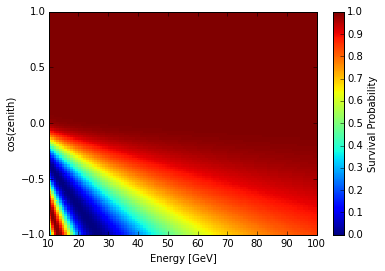

In [8]:
%matplotlib inline
X, Y = np.meshgrid(energies,zeniths)
p_map = [[getOscProbTwoNu(e,angle) for e in energies] for angle in zeniths]
p_map = np.array(p_map)
print p_map
plt.pcolor(energies, np.cos(zeniths), p_map, vmin=0, vmax=1)
#plt.xscale('log')
plt.xlabel('Energy [GeV]')
plt.ylabel('cos(zenith)')
plt.colorbar(label='Survival Probability')

saveIt=False
if saveIt:
    plt.savefig(save_loc+"2nu_oscCalc.pdf")
    plt.savefig(save_loc+"2nu_oscCalc.png")

In [9]:
infilenames = {}
flavours=['nue','numu','nutau']
infilenames['nue']=[]
infilenames['numu']=[]
infilenames['nutau']=[]
n_files= {}
n_files['nue'] = 50
n_files['numu'] = 50
n_files['nutau'] = 50
simulation = "600"
for flav in flavours: 
    flav_ind = 0
    if flav=="nue":flav_ind=12
    elif flav=="numu":flav_ind=14
    elif flav=="nutau": flav_ind=16
    for ind in xrange(n_files[flav]):
        infilenames[flav].append("/lustre/fs19/group/icecube/terliuk/DeepCore_sim/offL2/%i%s/genie_ic.%i%s.%s.i3.gz"%(
                               flav_ind,simulation,flav_ind,simulation,str(ind).zfill(6)))


In [10]:
def getScatteringType(genie_interaction):
    if genie_interaction['dis']:
        return 1
    elif genie_interaction['res']:
        return 2
    elif genie_interaction['qel']:
        return 3
    elif genie_interaction['coh']:
        return 4
    else:
        return 0


energy = {}
zenith = {}
weight = {}
osc_weight = {}
inttype = {}
nutype = {}
scattering = {}
ntpratio = {}
flux_weight = {}
NDPlus = {}
NDMinus = {}
NPiPlus = {}
NPiMinus = {}
PiPlusE = {}
PiMinusE = {}

NKPlus = {}
NKMinus = {}
KPlusE = {}
KMinusE = {}

PionE = {}
NPions = {}
MuonE = {}
NMuons = {}

for flavour in flavours:
    if flavour != 'numu':continue
    energy[flavour] = []
    weight[flavour] = []
    ntpratio[flavour] = [] 
    zenith[flavour] = []
    osc_weight[flavour] = []
    inttype[flavour] = []
    nutype[flavour] = []
    scattering[flavour] = []
    flux_weight[flavour] = []
    NDPlus[flavour] = []
    NDMinus[flavour] = []
    NPiPlus[flavour] = []
    NPiMinus[flavour] = []
    PiPlusE[flavour] = []
    PiMinusE[flavour] = []
    
    NKPlus[flavour] = []
    NKMinus[flavour] = []
    KPlusE[flavour] = []
    KMinusE[flavour] = []
    
    PionE[flavour] = {}
    PionE[flavour]['1'] = []
    PionE[flavour]['2'] = []
    PionE[flavour]['3'] = []
    PionE[flavour]['4'] = []
    PionE[flavour]['5'] = []
    PionE[flavour]['6'] = []
    PionE[flavour]['7'] = []
    PionE[flavour]['8'] = []
    PionE[flavour]['9'] = []
    PionE[flavour]['10'] = []

    MuonE[flavour] = {}
    MuonE[flavour]['1'] = []
    MuonE[flavour]['2'] = []
    MuonE[flavour]['3'] = []
    MuonE[flavour]['4'] = []
    MuonE[flavour]['5'] = []
    MuonE[flavour]['6'] = []
    MuonE[flavour]['7'] = []
    MuonE[flavour]['8'] = []
    MuonE[flavour]['9'] = []
    MuonE[flavour]['10'] = []
    
    NMuons[flavour]= []
    NPions[flavour]= []
    
    print flavour
    #foobar = 0
    n_events_gt_10Muons = 0
    for fname in infilenames[flavour]:
        print fname
        infile = dataio.I3File(fname)
        for frame in infile:
            if frame.Stop==frame.Physics: 
                #foobar += 1
                if not frame['QFilterMask']['DeepCoreFilter_13'].condition_passed: continue
                genie_dict = frame['I3GENIEResultDict']
                scattering_type = getScatteringType(genie_dict)
                scattering[flavour].append(scattering_type) 
                
                inttype[flavour].append(frame['I3MCWeightDict']['InteractionType'])
                trueNeutrino = frame['I3MCTree'].primaries[0]
                energy[flavour].append(trueNeutrino.energy)
                mcweightdict = frame['I3MCWeightDict']
                oneweight    = mcweightdict['OneWeight']
                nevents      = mcweightdict['NEvents']
                factor       = 0.0
                
                my_numutype = 0
                if int(trueNeutrino.type) in [12,14,16]: 
                    factor = 0.7
                    #ntpratio[flavour].append(f(trueNeutrino.energy))
                    my_numutype = dataclasses.I3Particle.ParticleType.NuMu
                elif int(trueNeutrino.type) in [-12,-14,-16]:
                    factor = 0.3
                    #ntpratio[flavour].append(fbar(trueNeutrino.energy))
                    my_numutype = dataclasses.I3Particle.ParticleType.NuMuBar

                flux_weight[flavour].append(flux_model.getFlux(my_numutype,trueNeutrino.energy,np.cos(trueNeutrino.dir.zenith)))                
                nutype[flavour].append(int(trueNeutrino.type))
                weight[flavour].append(oneweight/(nevents*factor*n_files[flavour]))
                zenith[flavour].append(trueNeutrino.dir.zenith)
                osc_weight[flavour].append(getOscProbTwoNu(trueNeutrino.energy,trueNeutrino.dir.zenith))
                
                #Loop through the daughter particles and count the D+/-, Pi+/-
                daughters = frame['I3MCTree'].get_daughters(trueNeutrino)
                nDPlus=0
                nDMinus=0
                
                nPions = 0
                
                nPiPlus=0
                nPiMinus=0
                nKPlus=0
                nKMinus=0
                total_kplusE = 0
                total_kminusE = 0
                total_piplusE = 0
                total_piminusE = 0
                nMuons = 0
                total_muonE = 0
                
                #initialize the muon energy arrays with -1 so that the weighting will work.
                for i, muonE_array in MuonE[flavour].iteritems():
                    muonE_array.append(-1)
                #initialize the pion energy arrays with -1 so that the weighting will work.
                for i, pionE_array in PionE[flavour].iteritems():
                    pionE_array.append(-1) 

                for daughter in daughters:
                    #print daughter.type
                    if daughter.type == dataclasses.I3Particle.ParticleType.DPlus: nDPlus +=1
                    elif daughter.type == dataclasses.I3Particle.ParticleType.DMinus: nDMinus +=1                
                    elif daughter.type in [dataclasses.I3Particle.ParticleType.PiPlus,
                                           dataclasses.I3Particle.ParticleType.PiMinus]:
                        
                        nPions += 1
                        # If we have some muons, replace the temp (-1 GeV) energy with the real one
                        if str(nPions) in PionE[flavour].keys():
                            PionE[flavour][str(nPions)][-1] = daughter.energy
                        
                        if daughter.type == dataclasses.I3Particle.ParticleType.PiPlus: 
                            nPiPlus +=1
                            total_piplusE += daughter.energy
                        elif daughter.type == dataclasses.I3Particle.ParticleType.PiMinus: 
                            nPiMinus +=1                        
                            total_piminusE += daughter.energy
                            
                    elif daughter.type == dataclasses.I3Particle.ParticleType.KPlus: 
                        nKPlus +=1
                        total_kplusE += daughter.energy
                    elif daughter.type == dataclasses.I3Particle.ParticleType.KMinus: 
                        nKMinus +=1                        
                        total_kminusE += daughter.energy
                    elif daughter.type in [dataclasses.I3Particle.ParticleType.MuPlus,
                                           dataclasses.I3Particle.ParticleType.MuMinus]:
                        nMuons += 1
                        # If we have some muons, replace the temp (-1 GeV) energy with the real one
                        if str(nMuons) in MuonE[flavour].keys():
                            MuonE[flavour][str(nMuons)][-1] = daughter.energy
                        else:
                            n_events_gt_10Muons += 1
                            
                        total_muonE += daughter.energy
                        
                #if nMuons > 1: print frame['I3MCTree']
                #print nPiPlus, nPiMinus
                
                NDPlus[flavour].append(nDPlus)
                NDMinus[flavour].append(nDMinus)
                NPiPlus[flavour].append(nPiPlus)
                NPiMinus[flavour].append(nPiMinus)
                NMuons[flavour].append(nMuons)
                NPions[flavour].append(nPions)
                NKPlus[flavour].append(nKPlus)
                NKMinus[flavour].append(nKMinus)
                
                if nPiPlus > 0: PiPlusE[flavour].append(total_piplusE/nPiPlus)
                else: PiPlusE[flavour].append(0.)
                    
                if nPiMinus > 0: PiMinusE[flavour].append(total_piminusE/nPiMinus)          
                else: PiMinusE[flavour].append(0.)
 
                if nKPlus > 0: KPlusE[flavour].append(total_kplusE/nKPlus)
                else: KPlusE[flavour].append(0.)
                    
                if nKMinus > 0: KMinusE[flavour].append(total_kminusE/nKMinus)          
                else: KMinusE[flavour].append(0.)                    
                    
                #if nMuons > 0: MuonE[flavour].append(total_muonE/nMuons)
                #else: MuonE[flavour].append(0.)
                #if foobar > 10: break
                
                
                #pass
    energy[flavour] = np.array(energy[flavour])
    flux_weight[flavour] = np.array(flux_weight[flavour])
    ntpratio[flavour] = np.array(ntpratio[flavour])
    zenith[flavour] = np.array(zenith[flavour])
    weight[flavour] = np.array(weight[flavour])
    osc_weight[flavour] = np.array(osc_weight[flavour])
    inttype[flavour] = np.array(inttype[flavour])
    nutype[flavour] = np.array(nutype[flavour])
    scattering[flavour] = np.array(scattering[flavour])
    NDPlus[flavour] = np.array(NDPlus[flavour])
    NDMinus[flavour] = np.array(NDMinus[flavour])
    
    NPiPlus[flavour] = np.array(NPiPlus[flavour])
    NPiMinus[flavour] = np.array(NPiMinus[flavour])
    PiPlusE[flavour] = np.array(PiPlusE[flavour])
    PiMinusE[flavour] = np.array(PiMinusE[flavour])

    NKPlus[flavour] = np.array(NKPlus[flavour])
    NKMinus[flavour] = np.array(NKMinus[flavour])
    KPlusE[flavour] = np.array(KPlusE[flavour])
    KMinusE[flavour] = np.array(KMinusE[flavour])    
    
    for value in MuonE[flavour].itervalues():
        value = np.array(value)
    NMuons[flavour] = np.array(NMuons[flavour])
    
    for value in PionE[flavour].itervalues():
        value = np.array(value)
    NPions[flavour] = np.array(NPions[flavour])
    

numu
/lustre/fs19/group/icecube/terliuk/DeepCore_sim/offL2/14600/genie_ic.14600.000000.i3.gz
/lustre/fs19/group/icecube/terliuk/DeepCore_sim/offL2/14600/genie_ic.14600.000001.i3.gz
/lustre/fs19/group/icecube/terliuk/DeepCore_sim/offL2/14600/genie_ic.14600.000002.i3.gz
/lustre/fs19/group/icecube/terliuk/DeepCore_sim/offL2/14600/genie_ic.14600.000003.i3.gz
/lustre/fs19/group/icecube/terliuk/DeepCore_sim/offL2/14600/genie_ic.14600.000004.i3.gz
/lustre/fs19/group/icecube/terliuk/DeepCore_sim/offL2/14600/genie_ic.14600.000005.i3.gz
/lustre/fs19/group/icecube/terliuk/DeepCore_sim/offL2/14600/genie_ic.14600.000006.i3.gz
/lustre/fs19/group/icecube/terliuk/DeepCore_sim/offL2/14600/genie_ic.14600.000007.i3.gz
/lustre/fs19/group/icecube/terliuk/DeepCore_sim/offL2/14600/genie_ic.14600.000008.i3.gz
/lustre/fs19/group/icecube/terliuk/DeepCore_sim/offL2/14600/genie_ic.14600.000009.i3.gz
/lustre/fs19/group/icecube/terliuk/DeepCore_sim/offL2/14600/genie_ic.14600.000010.i3.gz
/lustre/fs19/group/icecube/

numu


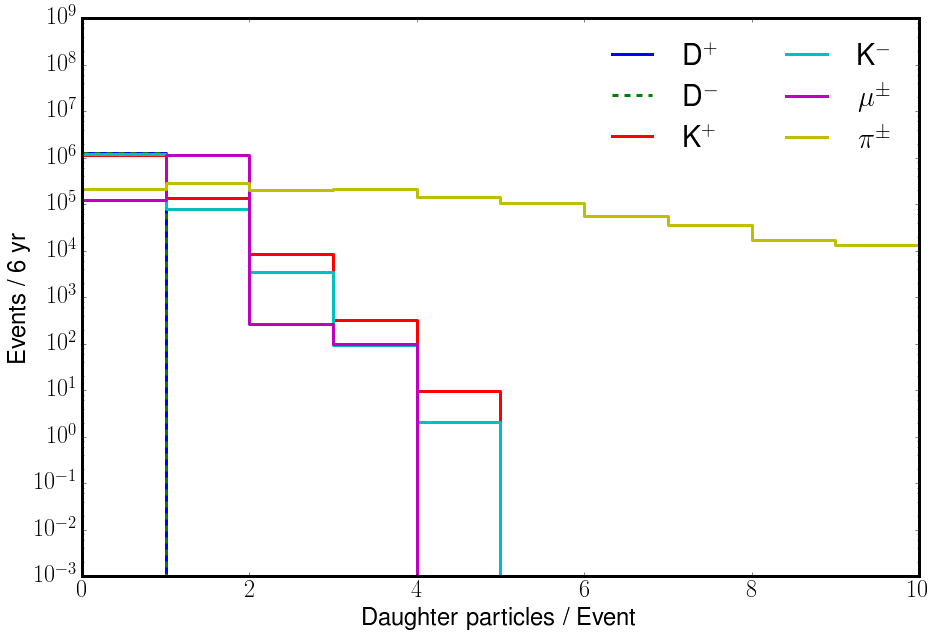

In [11]:
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', size=24)
plt.rc('axes',linewidth= 3.0)
fig = plt.figure(figsize=(15,10), facecolor = "w")
ax = fig.add_subplot(111)
bins = np.linspace(0,10,11)

years = 6

for flav in flavours:
    
    if flav != 'numu': continue
    
    full_weight = weight[flav]*flux_weight[flav]*osc_weight[flav]
    
    histo_dplus = np.histogram(NDPlus[flav], weights=full_weight, bins = bins)[0]*3.154e7*years        
    plt.step(bins, np.append(histo_dplus, [0]), where="post", 
             lw =3 ,ls='-',label ='D$^{+}$')
    
    histo_dminus = np.histogram(NDMinus[flav], weights=full_weight, bins = bins)[0]*3.154e7*years
    plt.step(bins, np.append(histo_dminus, [0]), where="post", 
             lw =3 ,ls='--',label ='D$^{-}$')
    
#     histo_piplus = np.histogram(NPiPlus[flav], weights=full_weight, bins = bins)[0]*3.154e7*years        
#     plt.step(bins, np.append(histo_piplus, [0]), where="post", 
#              lw =3 ,ls='-',label ='$\pi^{+}$')             
                                                                 
#     histo_piminus = np.histogram(NPiMinus[flav], weights=full_weight, bins = bins)[0]*3.154e7*years        
#     plt.step(bins, np.append(histo_piminus, [0]), where="post", 
#              lw =3 ,ls='-',label ='$\pi^{-}$')     

    histo_kplus = np.histogram(NKPlus[flav], weights=full_weight, bins = bins)[0]*3.154e7*years        
    plt.step(bins, np.append(histo_kplus, [0]), where="post", 
             lw =3 ,ls='-',label ='K$^{+}$')             
                                                                 
    histo_kminus = np.histogram(NKMinus[flav], weights=full_weight, bins = bins)[0]*3.154e7*years        
    plt.step(bins, np.append(histo_kminus, [0]), where="post", 
             lw =3 ,ls='-',label ='K$^{-}$')     
    
    histo_muons = np.histogram(NMuons[flav], weights=full_weight, bins = bins)[0]*3.154e7*years        
    plt.step(bins, np.append(histo_muons, [0]), where="post", 
             lw =3 ,ls='-',label ='$\mu^{\pm}$')                                                                 

    histo_pions = np.histogram(NPions[flav], weights=full_weight, bins = bins)[0]*3.154e7*years        
    plt.step(bins, np.append(histo_pions, [0]), where="post", 
             lw =3 ,ls='-',label ='$\pi^{\pm}$')          
    

    print flav
plt.legend(loc='upper right',frameon=False,ncol=2)
#ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim([0.001,10e8])
ax.set_xlabel("Daughter particles / Event")
ax.set_ylabel("Events / 6 yr")
#ax.text(250, 5, "Simulation : 1X"+simulation+ ", CC+NC")

plotting 10 -th muon E
plotting 1 -th muon E
plotting 3 -th muon E
plotting 2 -th muon E
plotting 5 -th muon E
plotting 4 -th muon E
plotting 7 -th muon E
plotting 6 -th muon E
plotting 9 -th muon E
plotting 8 -th muon E
plotting 10 -th pion E
plotting 1 -th pion E
plotting 3 -th pion E
plotting 2 -th pion E
plotting 5 -th pion E
plotting 4 -th pion E
plotting 7 -th pion E
plotting 6 -th pion E
plotting 9 -th pion E
plotting 8 -th pion E
numu


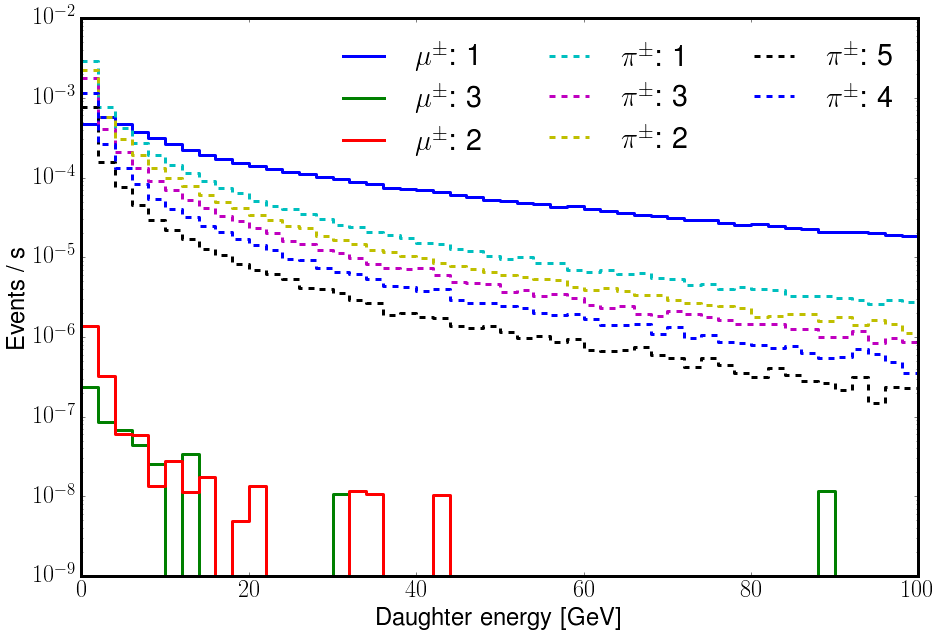

In [12]:
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', size=24)
plt.rc('axes',linewidth= 3.0)
fig = plt.figure(figsize=(15,10), facecolor = "w")
ax = fig.add_subplot(111)
bins = np.linspace(0,100,51)

for flav in flavours:
    
    if flav != 'numu': continue
    
    full_weight = weight[flav]*flux_weight[flav]*osc_weight[flav]

#     histo_piplus = np.histogram(PiPlusE[flav], weights=full_weight, bins = bins)[0]        
#     plt.step(bins, np.append(histo_piplus, [0]), where="post", 
#              lw =3 ,ls='-',label ='$\pi^{+}$ Avg. E')             
                                                                 
#     histo_piminus = np.histogram(PiMinusE[flav], weights=full_weight, bins = bins)[0]        
#     plt.step(bins, np.append(histo_piminus, [0]), where="post", 
#              lw =3 ,ls='--',label ='$\pi^{-}$ Avg. E')                                                                 

    histo_muon = []
    for i, muonE in MuonE[flav].iteritems():
        print 'plotting',i,'-th muon E'
        muonE = np.array(muonE)
        if np.all(muonE == -1):
            'No event had that many muons'
            continue
        
        histo_muon.append(np.histogram(muonE, weights=full_weight, bins = bins)[0])        
        plt.step(bins, np.append(histo_muon[-1], [0]), where="post", 
                 lw =3 ,ls='-',label ='$\mu^{\pm}$: '+str(i))                                         

    
    histo_pion = []
    for i, pionE in PionE[flav].iteritems():
        print 'plotting',i,'-th pion E'
        if int(i) > 5:continue
        pionE = np.array(pionE)
        if np.all(pionE == -1):
            'No event had that many muons'
            continue
        
        histo_pion.append(np.histogram(pionE, weights=full_weight, bins = bins)[0])        
        plt.step(bins, np.append(histo_pion[-1], [0]), where="post", 
                 lw =3 ,ls='--',label ='$\pi^{\pm}$: '+str(i))      
        
    
    print flav
plt.legend(loc=1,ncol=3,frameon=False)
#ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Daughter energy [GeV]")
ax.set_ylabel("Events / s")
#ax.text(250, 5, "Simulation : 1X"+simulation+ ", CC+NC")

plotting 10 -th muon E
plotting 1 -th muon E
plotting 3 -th muon E
plotting 2 -th muon E
plotting 5 -th muon E
plotting 4 -th muon E
plotting 7 -th muon E
plotting 6 -th muon E
plotting 9 -th muon E
plotting 8 -th muon E
numu


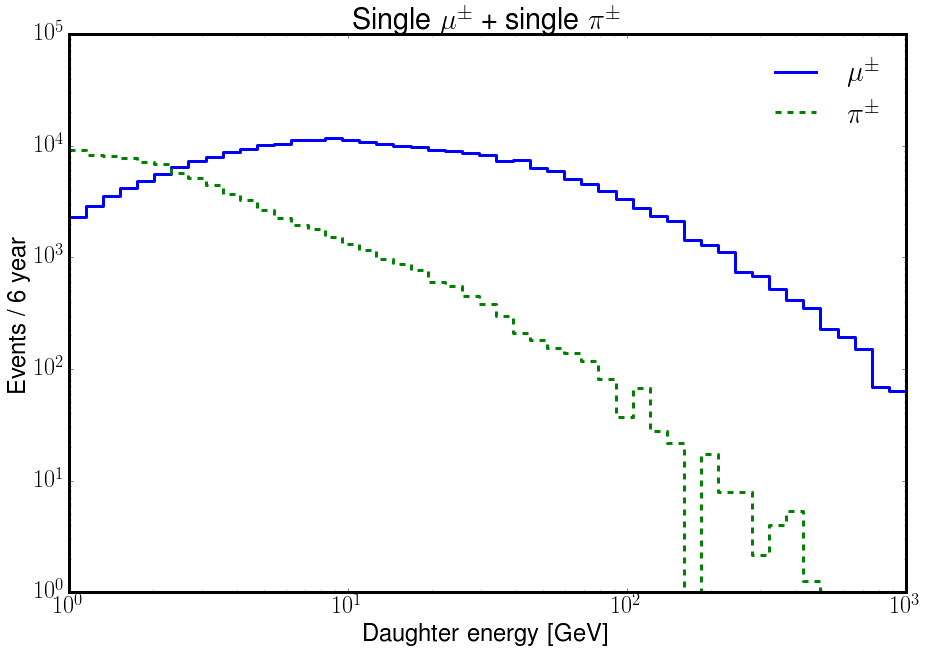

In [15]:
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', size=24)
plt.rc('axes',linewidth= 3.0)
fig = plt.figure(figsize=(15,10), facecolor = "w")
ax = fig.add_subplot(111)
#bins = np.linspace(0,1000,51)
bins = np.logspace(0,3,50)

years = 6

for flav in flavours:
    
    if flav != 'numu': continue
    
    full_weight = weight[flav]*flux_weight[flav]*osc_weight[flav]*3.154e7*years

    my_bool = (NMuons[flav] == 1)*(NPions[flav] == 1)*(inttype[flav]==1.0)
    
    histo_muon = []
    for i, muonE in MuonE[flav].iteritems():
        #if int(i) > 1:continue
        print 'plotting',i,'-th muon E'
        muonE = np.array(muonE)[my_bool]
        if np.all(muonE == -1):
            'No event had that many muons'
            continue
        
        histo_muon.append(np.histogram(muonE, weights=full_weight[my_bool], bins = bins)[0])        
        plt.step(bins, np.append(histo_muon[-1], [0]), where="post", 
                 lw =3 ,ls='-',label ='$\mu^{\pm}$')                                         

    
    histo_pion = []
    for i, pionE in PionE[flav].iteritems():
        #if int(i) > 1:continue
        #print 'plotting',i,'-th pion E'
        pionE = np.array(pionE)[my_bool]
        if np.all(pionE == -1):
            'No event had that many muons'
            continue
        
        histo_pion.append(np.histogram(pionE, weights=full_weight[my_bool], bins = bins)[0])        
        plt.step(bins, np.append(histo_pion[-1], [0]), where="post", 
                 lw =3 ,ls='--',label ='$\pi^{\pm}$')      
    
#     histo_pion2 = []
#     for i, pionE in PionE[flav].iteritems():
#         pionE = np.array(pionE)[my_bool]
#         if np.all(pionE == -1):
#             'No event had that many muons'
#             continue
        
#         histo_pion.append(np.histogram(pionE, weights=full_weight[my_bool], bins = bins)[0])   
#         plt.step(bins, np.append(histo_pion[-1]*0.75, [0]), where="post", 
#                  lw =3 ,ls='--',label ='$\pi^{\pm}$, 75\% of energy')  

    print flav
plt.legend(loc=1,ncol=1,frameon=False)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Daughter energy [GeV]")
ax.set_ylabel("Events / 6 year")
plt.title('Single $\mu^{\pm}$ + single $\pi^{\pm}$')
#ax.text(250, 5, "Simulation : 1X"+simulation+ ", CC+NC")

numu


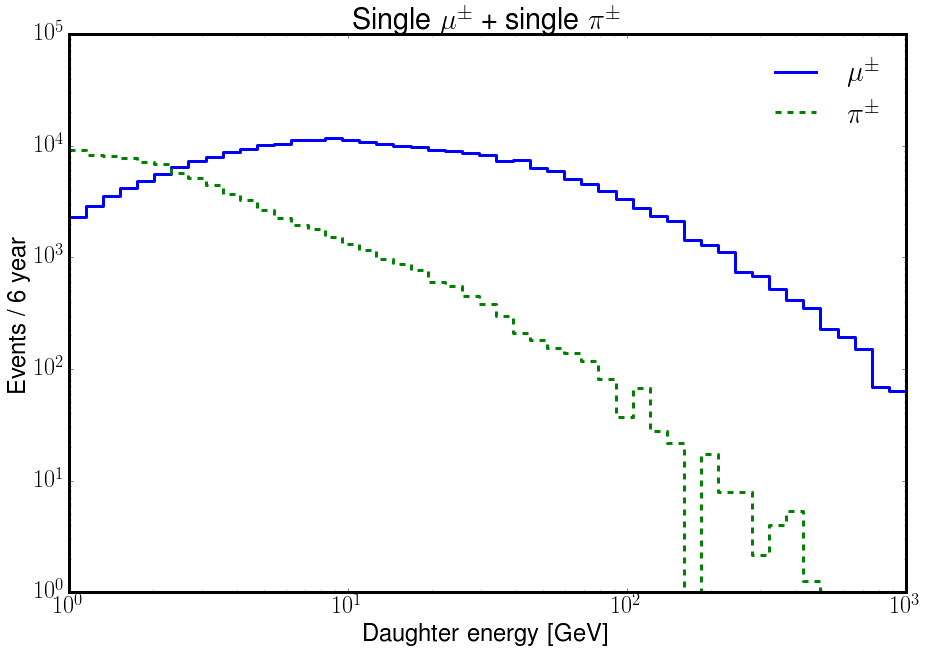

In [32]:
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', size=24)
plt.rc('axes',linewidth= 3.0)
fig = plt.figure(figsize=(15,10), facecolor = "w")
ax = fig.add_subplot(111)
#bins = np.linspace(0,1000,51)
bins = np.logspace(0,3,50)

years = 6

for flav in flavours:
    
    if flav != 'numu': continue
    
    full_weight = weight[flav]*flux_weight[flav]*osc_weight[flav]*3.154e7*years

    my_bool = (NMuons[flav] == 1)*(NPions[flav] == 1)*(inttype[flav]==1.0)
    
    muonE = np.array(MuonE[flav]['1'])[my_bool]
    pionE = np.array(PionE[flav]['1'])[my_bool]

    histo_muon = []
    histo_muon.append(np.histogram(muonE, weights=full_weight[my_bool], bins = bins)[0])        
    plt.step(bins, np.append(histo_muon[-1], [0]), where="post", 
             lw =3 ,ls='-',label ='$\mu^{\pm}$')                                         

    
    histo_pion = []
    histo_pion.append(np.histogram(pionE, weights=full_weight[my_bool], bins = bins)[0])        
    plt.step(bins, np.append(histo_pion[-1], [0]), where="post", 
             lw =3 ,ls='--',label ='$\pi^{\pm}$')      
    
#     histo_pion2 = []
#     for i, pionE in PionE[flav].iteritems():
#         pionE = np.array(pionE)[my_bool]
#         if np.all(pionE == -1):
#             'No event had that many muons'
#             continue
        
#         histo_pion.append(np.histogram(pionE, weights=full_weight[my_bool], bins = bins)[0])   
#         plt.step(bins, np.append(histo_pion[-1]*0.75, [0]), where="post", 
#                  lw =3 ,ls='--',label ='$\pi^{\pm}$, 75\% of energy')  

    print flav
plt.legend(loc=1,ncol=1,frameon=False)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Daughter energy [GeV]")
ax.set_ylabel("Events / 6 year")
plt.title('Single $\mu^{\pm}$ + single $\pi^{\pm}$')
#ax.text(250, 5, "Simulation : 1X"+simulation+ ", CC+NC")

In [31]:
print MuonE['numu']['1'][:10]

[0.2956355712119375, 2.2399945035418143, 2.89711118268004, 3.0242427819749587, 3.6952053257284323, 1.0905331232373785, 1.7095410529951989, 3.4856759114383, 1.8778502273610476, 2.0131825552634415]


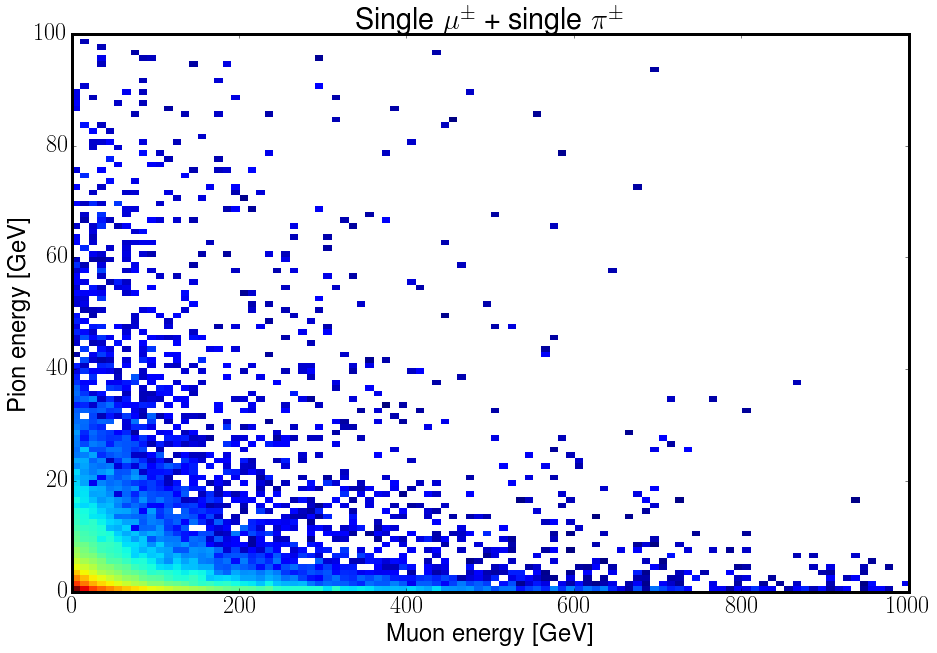

In [46]:
from matplotlib.colors import LogNorm

%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', size=24)
plt.rc('axes',linewidth= 3.0)
fig = plt.figure(figsize=(15,10), facecolor = "w")
ax = fig.add_subplot(111)
linbins = np.linspace(0,1000,101)
logbins = np.logspace(0,3,50)

years = 6

for flav in flavours:
    
    if flav != 'numu': continue
    
    full_weight = weight[flav]*flux_weight[flav]*osc_weight[flav]*3.154e7*years

    my_bool = (NMuons[flav] == 1)*(NPions[flav] == 1)*(inttype[flav]==1.0)
    
    muonE = np.array(MuonE[flav]['1'])[my_bool]
    pionE = np.array(PionE[flav]['1'])[my_bool]
            
    histo_2D = plt.hist2d(muonE,pionE,bins=[linbins,np.linspace(0,100,101)],weights = full_weight[my_bool],norm=LogNorm())                                        

plt.legend(loc=1,ncol=1,frameon=False)
#ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlabel("Muon energy [GeV]")
ax.set_ylabel("Pion energy [GeV]")
plt.title('Single $\mu^{\pm}$ + single $\pi^{\pm}$')
#ax.text(250, 5, "Simulation : 1X"+simulation+ ", CC+NC")